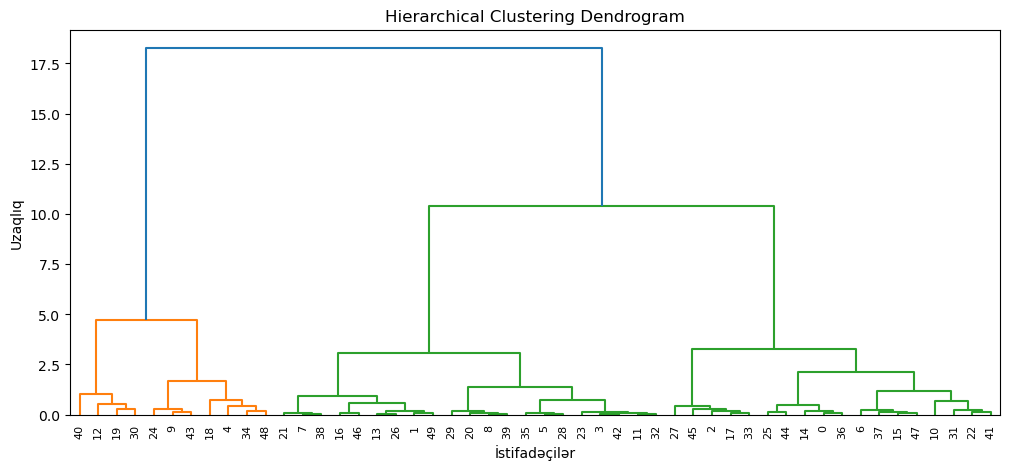

           username  posts_per_day  likes_per_day  comments_per_day  \
0           ayla_97              5            120                14   
1        kamran_pro              1             15                 2   
2        narmin_sky              8            300                40   
3       rustam.tech              3             50                 5   
4        leyla_star             10            500                70   
5         ilkin_dev              2             30                 4   
6        samir_dark              7            280                35   
7         luna_zero              0              5                 0   
8        tunar_wave              4             90                10   
9         melisa_22              9            450                60   
10     ferid_master              6            220                25   
11         selena_q              3             55                 6   
12          altay_x             12            700                90   
13    

In [4]:
!pip install pandas scikit-learn scipy matplotlib

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

df = pd.read_csv("social_users.csv")

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
features = df[numeric_cols]

if features.shape[1] == 0:
    raise ValueError("Dataset-də rəqəmsal sütun tapılmadı.")

scaled = StandardScaler().fit_transform(features)

plt.figure(figsize=(12,5))
sch.dendrogram(sch.linkage(scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("İstifadəçilər")
plt.ylabel("Uzaqlıq")
plt.show()

model = AgglomerativeClustering(n_clusters=3)
df['cluster'] = model.fit_predict(scaled)

print(df)
print("İstifadəçi sayı:", len(df))

aktiv = (df['cluster'] == 0).sum()
orta_aktiv = (df['cluster'] == 1).sum()
passiv = (df['cluster'] == 2).sum()

print(f"Aktivlar: {aktiv}")
print(f"Orta aktivlər: {orta_aktiv}")
print(f"Passivlər: {passiv}")

